In [5]:
pip install geo pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import geopandas as gpd

# Load the shapefile
shapefile_path = "ny_2022_gen_prec/ny_2022_gen_prec.shp"
gdf = gpd.read_file(shapefile_path)


# Specify the columns to keep
columns_to_keep = [
    'UNIQUE_ID', 'COUNTYFP', 'GEOID', 'CountyName', 
    'EDName', 'EDID', 'MuniName', 'MuniID', 
    'CONG_DIST', 'SLDL_DIST', 'SLDU_DIST','GCON02DGOR','GCON02OWRI','GCON02RGAR'
]

# Filter rows where CONG_DIST = '02' and keep specific columns
filtered_data = gdf[gdf['CONG_DIST'] == '02'][columns_to_keep]

# Print a preview of the filtered data
print(filtered_data.head())


                       UNIQUE_ID COUNTYFP         GEOID CountyName  \
5507   059-:-Hempstead AD 9 ED 0      059  360590209000     Nassau   
6359  059-:-Oyster Bay AD 9 ED 1      059  360590509001     Nassau   
6360  059-:-Oyster Bay AD 9 ED 2      059  360590509002     Nassau   
6361  059-:-Oyster Bay AD 9 ED 3      059  360590509003     Nassau   
6362  059-:-Oyster Bay AD 9 ED 4      059  360590509004     Nassau   

                    EDName   EDID    MuniName  MuniID CONG_DIST SLDL_DIST  \
5507   Hempstead AD 9 ED 0  09000   Hempstead       2        02       009   
6359  Oyster Bay AD 9 ED 1  09001  Oyster Bay       5        02       009   
6360  Oyster Bay AD 9 ED 2  09002  Oyster Bay       5        02       009   
6361  Oyster Bay AD 9 ED 3  09003  Oyster Bay       5        02       009   
6362  Oyster Bay AD 9 ED 4  09004  Oyster Bay       5        02       009   

     SLDU_DIST  GCON02DGOR  GCON02OWRI  GCON02RGAR  
5507        08           0           0           0  
6359      

In [7]:
# Define the function to determine the winning party
def determine_winner(row):
    if row['GCON02DGOR'] > row['GCON02OWRI'] and row['GCON02DGOR'] > row['GCON02RGAR']:
        return 'democrat'
    elif row['GCON02RGAR'] > row['GCON02DGOR'] and row['GCON02RGAR'] > row['GCON02OWRI']:
        return 'rep'
    else:
        return 'write-in'

# Apply the function to create the 'win' column
filtered_data['win'] = filtered_data.apply(determine_winner, axis=1)

# Display the updated DataFrame
print(filtered_data)


                        UNIQUE_ID COUNTYFP         GEOID CountyName  \
5507    059-:-Hempstead AD 9 ED 0      059  360590209000     Nassau   
6359   059-:-Oyster Bay AD 9 ED 1      059  360590509001     Nassau   
6360   059-:-Oyster Bay AD 9 ED 2      059  360590509002     Nassau   
6361   059-:-Oyster Bay AD 9 ED 3      059  360590509003     Nassau   
6362   059-:-Oyster Bay AD 9 ED 4      059  360590509004     Nassau   
...                           ...      ...           ...        ...   
12281             103-:-Islip 222      103  361030500222    Suffolk   
12282             103-:-Islip 223      103  361030500223    Suffolk   
12283             103-:-Islip 224      103  361030500224    Suffolk   
12284             103-:-Islip 225      103  361030500225    Suffolk   
12285             103-:-Islip 226      103  361030500226    Suffolk   

                     EDName   EDID    MuniName  MuniID CONG_DIST SLDL_DIST  \
5507    Hempstead AD 9 ED 0  09000   Hempstead       2        02     

In [8]:
import pandas as pd

# Load the CSV file
csv_file_path = "ny_edu_2022_bg.csv"
csv_data = pd.read_csv(csv_file_path)

# Check if the 'GEOID' column exists
if 'GEOID' in csv_data.columns:
    # Display the first few values of the GEOID column
    print("First few GEOIDs in the CSV file:")
    print(csv_data['GEOID'].head())
else:
    print("Error: 'GEOID' column not found in the CSV file.")


First few GEOIDs in the CSV file:
0    360530301011
1    360530301012
2    360530301021
3    360530301022
4    360530301023
Name: GEOID, dtype: int64


In [9]:

# Ensure consistent data types for the 'COUNTYFP' column
filtered_data['COUNTYFP'] = filtered_data['COUNTYFP'].astype(str)
csv_data['COUNTYFP'] = csv_data['COUNTYFP'].astype(str)

# Perform the join
joined_data = filtered_data.merge(csv_data, on='COUNTYFP', how='inner')

# Print the resulting joined data
print("Joined Data:")
print(joined_data.head())

Joined Data:
         UNIQUE_ID COUNTYFP       GEOID_x CountyName     EDName   EDID  \
0  103-:-Babylon 1      103  361030100001    Suffolk  Babylon 1  00001   
1  103-:-Babylon 1      103  361030100001    Suffolk  Babylon 1  00001   
2  103-:-Babylon 1      103  361030100001    Suffolk  Babylon 1  00001   
3  103-:-Babylon 1      103  361030100001    Suffolk  Babylon 1  00001   
4  103-:-Babylon 1      103  361030100001    Suffolk  Babylon 1  00001   

  MuniName  MuniID CONG_DIST SLDL_DIST  ...           COUNTY  POP_25OV22  \
0  Babylon       1        02       009  ...   Suffolk County         869   
1  Babylon       1        02       009  ...   Suffolk County         723   
2  Babylon       1        02       009  ...   Suffolk County         787   
3  Babylon       1        02       009  ...   Suffolk County         880   
4  Babylon       1        02       009  ...   Suffolk County         821   

   N_HSDIP22  HS_DIP22 SOM_COLL22  ASSO_DEG22  BACH_DEG22 MAST_DEG22  \
0         12 

In [10]:
# Check column names in the joined data
print("Column Names in Joined Data:")
print(joined_data.columns.tolist())
# Check dimensions of the joined data
print("Dimensions of Joined Data (rows, columns):")
print(joined_data.shape)


Column Names in Joined Data:
['UNIQUE_ID', 'COUNTYFP', 'GEOID_x', 'CountyName', 'EDName', 'EDID', 'MuniName', 'MuniID', 'CONG_DIST', 'SLDL_DIST', 'SLDU_DIST', 'GCON02DGOR', 'GCON02OWRI', 'GCON02RGAR', 'win', 'GEOID_y', 'STATEFP', 'STATE', 'COUNTY', 'POP_25OV22', 'N_HSDIP22', 'HS_DIP22', 'SOM_COLL22', 'ASSO_DEG22', 'BACH_DEG22', 'MAST_DEG22', 'PROF_DEG22', 'DOCT_DEG22']
Dimensions of Joined Data (rows, columns):
(520536, 28)


In [11]:
columns_to_drop = ['CountyName', 'EDName', 'EDID', 'MuniName', 'MuniID', 
                   'SLDL_DIST', 'SLDU_DIST', 'GCON02DGOR', 'GCON02OWRI', 
                   'GCON02RGAR', 'GEOID_y', 'STATEFP', 'STATE', 'COUNTY']

# Drop the columns from the dataframe
joined_data = joined_data.drop(columns=columns_to_drop)

# Verify the remaining columns
print(joined_data.columns)



Index(['UNIQUE_ID', 'COUNTYFP', 'GEOID_x', 'CONG_DIST', 'win', 'POP_25OV22',
       'N_HSDIP22', 'HS_DIP22', 'SOM_COLL22', 'ASSO_DEG22', 'BACH_DEG22',
       'MAST_DEG22', 'PROF_DEG22', 'DOCT_DEG22'],
      dtype='object')


In [12]:
joined_data.isnull().sum()


UNIQUE_ID     0
COUNTYFP      0
GEOID_x       0
CONG_DIST     0
win           0
POP_25OV22    0
N_HSDIP22     0
HS_DIP22      0
SOM_COLL22    0
ASSO_DEG22    0
BACH_DEG22    0
MAST_DEG22    0
PROF_DEG22    0
DOCT_DEG22    0
dtype: int64

In [13]:
# Map categorical values to numerical values
joined_data['win'] = joined_data['win'].map({'rep': 0, 'democrat': 1, 'write-in': 2})



In [14]:
print(joined_data['win'].unique())  # Should show [0, 1, 2] or fewer if some categories are absent


[0 1 2]


In [15]:
# Check the data types of columns in X
print(X.dtypes)

# Check for non-numeric data in X
for col in X.columns:
    if X[col].dtype == 'object':
        print(f"Non-numeric data found in column: {col}")
        print(X[col].unique())  # Display unique values for the column


NameError: name 'X' is not defined

In [16]:
print(joined_data.dtypes)


UNIQUE_ID     object
COUNTYFP      object
GEOID_x       object
CONG_DIST     object
win            int64
POP_25OV22     int64
N_HSDIP22      int64
HS_DIP22       int64
SOM_COLL22     int64
ASSO_DEG22     int64
BACH_DEG22     int64
MAST_DEG22     int64
PROF_DEG22     int64
DOCT_DEG22     int64
dtype: object


In [17]:
print(joined_data.isnull().sum())


UNIQUE_ID     0
COUNTYFP      0
GEOID_x       0
CONG_DIST     0
win           0
POP_25OV22    0
N_HSDIP22     0
HS_DIP22      0
SOM_COLL22    0
ASSO_DEG22    0
BACH_DEG22    0
MAST_DEG22    0
PROF_DEG22    0
DOCT_DEG22    0
dtype: int64


In [18]:
# Convert CONG_DIST to numeric
joined_data['CONG_DIST'] = pd.to_numeric(joined_data['CONG_DIST'], errors='coerce')

# Verify
print(joined_data.dtypes)


UNIQUE_ID     object
COUNTYFP      object
GEOID_x       object
CONG_DIST      int64
win            int64
POP_25OV22     int64
N_HSDIP22      int64
HS_DIP22       int64
SOM_COLL22     int64
ASSO_DEG22     int64
BACH_DEG22     int64
MAST_DEG22     int64
PROF_DEG22     int64
DOCT_DEG22     int64
dtype: object


In [19]:
joined_data = joined_data.drop(columns=['UNIQUE_ID', 'COUNTYFP', 'GEOID_x'])


In [20]:
X = joined_data.drop(columns=['win'])  # Exclude the target variable
y = joined_data['win']                 # Target variable


In [21]:
# Check column names in the joined data
print("Column Names in Joined Data:")
print(joined_data.columns.tolist())

Column Names in Joined Data:
['CONG_DIST', 'win', 'POP_25OV22', 'N_HSDIP22', 'HS_DIP22', 'SOM_COLL22', 'ASSO_DEG22', 'BACH_DEG22', 'MAST_DEG22', 'PROF_DEG22', 'DOCT_DEG22']


In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7539670342336804
Classification Report:
               precision    recall  f1-score   support

           0       0.75      1.00      0.86     78494
           1       0.00      0.00      0.00     24524
           2       0.00      0.00      0.00      1090

    accuracy                           0.75    104108
   macro avg       0.25      0.33      0.29    104108
weighted avg       0.57      0.75      0.65    104108



C:\Users\rayap\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rayap\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rayap\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [24]:
# Check training accuracy
train_pred = model.predict(X_train)
print("Training Accuracy:", accuracy_score(y_train, train_pred))


Training Accuracy: 0.7540895424899382


In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay


In [26]:
# Initialize the Decision Tree with a max depth to prevent overfitting
dt_model = DecisionTreeClassifier(max_depth=10, random_state=42)

# Fit the model to the training data
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=10, random_state=42)

Accuracy: 0.7539670342336804
Classification Report:
               precision    recall  f1-score   support

           0       0.75      1.00      0.86     78494
           1       0.00      0.00      0.00     24524
           2       0.00      0.00      0.00      1090

    accuracy                           0.75    104108
   macro avg       0.25      0.33      0.29    104108
weighted avg       0.57      0.75      0.65    104108



C:\Users\rayap\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rayap\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rayap\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

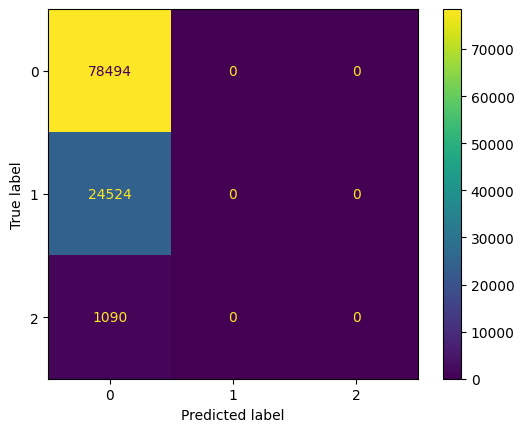

In [27]:
# Predict on test data
y_pred = dt_model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)


In [ ]:
from sklearn.tree import export_text, plot_tree
import matplotlib.pyplot as plt

# Text representation of the tree
print(export_text(dt_model, feature_names=list(X_train.columns)))

# Plot the tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=X_train.columns, class_names=['Class 0', 'Class 1', 'Class 2'], filled=True)
plt.show()


In [ ]:
from sklearn.tree import export_text

# Text representation of the tree
tree_rules = export_text(dt_model, feature_names=list(X_train.columns))
print(tree_rules)


In [28]:
# Import Logistic Regression
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
logistic_model = LogisticRegression(random_state=42, max_iter=1000)

# Fit the model to the training data
logistic_model.fit(X_train, y_train)


C:\Users\rayap\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=42)

In [30]:
# Import necessary libraries
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Predict on the training data
y_train_pred = logistic_model.predict(X_train)

# Predict on the test data
y_test_pred = logistic_model.predict(X_test)

# Evaluate the model on training data
print("Training Data Evaluation:")
print("Accuracy:", accuracy_score(y_train, y_train_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_train, y_train_pred))
print("\nClassification Report:")
print(classification_report(y_train, y_train_pred))

# Evaluate the model on test data
print("\nTest Data Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))


Training Data Evaluation:
Accuracy: 0.7540895424899382

Confusion Matrix:
[[314024      0      0]
 [ 98204      0      0]
 [  4200      0      0]]

Classification Report:


C:\Users\rayap\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rayap\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.75      1.00      0.86    314024
           1       0.00      0.00      0.00     98204
           2       0.00      0.00      0.00      4200

    accuracy                           0.75    416428
   macro avg       0.25      0.33      0.29    416428
weighted avg       0.57      0.75      0.65    416428


Test Data Evaluation:
Accuracy: 0.7539670342336804

Confusion Matrix:
[[78494     0     0]
 [24524     0     0]
 [ 1090     0     0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86     78494
           1       0.00      0.00      0.00     24524
           2       0.00      0.00      0.00      1090

    accuracy                           0.75    104108
   macro avg       0.25      0.33      0.29    104108
weighted avg       0.57      0.75      0.65    104108



C:\Users\rayap\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rayap\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rayap\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [31]:
# Import Naive Bayes
from sklearn.naive_bayes import GaussianNB

# Initialize the Naive Bayes model
nb_model = GaussianNB()

# Fit the model to the training data
nb_model.fit(X_train, y_train)


GaussianNB()

In [32]:
# Import necessary libraries
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Predict on the training data
y_train_pred = nb_model.predict(X_train)

# Predict on the test data
y_test_pred = nb_model.predict(X_test)

# Evaluate the model on training data
print("Training Data Evaluation:")
print("Accuracy:", accuracy_score(y_train, y_train_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_train, y_train_pred))
print("\nClassification Report:")
print(classification_report(y_train, y_train_pred))

# Evaluate the model on test data
print("\nTest Data Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))


Training Data Evaluation:
Accuracy: 0.7540895424899382

Confusion Matrix:
[[314024      0      0]
 [ 98204      0      0]
 [  4200      0      0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86    314024
           1       0.00      0.00      0.00     98204
           2       0.00      0.00      0.00      4200

    accuracy                           0.75    416428
   macro avg       0.25      0.33      0.29    416428
weighted avg       0.57      0.75      0.65    416428


Test Data Evaluation:
Accuracy: 0.7539670342336804

Confusion Matrix:
[[78494     0     0]
 [24524     0     0]
 [ 1090     0     0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86     78494
           1       0.00      0.00      0.00     24524
           2       0.00      0.00      0.00      1090

    accuracy                           0.75    104108
   macro avg     

C:\Users\rayap\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rayap\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rayap\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo